# Home Price Prediction

**Source**
This is the dataset used in this book: https://github.com/ageron/handson-ml/tree/master/datasets/housing to illustrate a sample end-to-end ML project workflow (pipeline). This is a great book!

The data is based on California Census in 1990.

**About the Data** :

This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto).

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

**Objective**:

Develop a predictive model to estimate the Median House Value using the provided characteristics. Identifiy which features are most informative in predicting house value.  


### Import required libraries

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split


# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [ ]:
import requests
import pandas as pd
from io import StringIO

orig_url="https://drive.google.com/file/d/1Btewck_WuX41RQvVItWa220JWRGRDMpo/view?usp=drive_link"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Independent Variables:**

- longitude
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- ocean_proximity

**Dependent Variable**

- median_house_value

### Data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observations**:
* There are 20640 non-null observations in each of the columns except the total_bedrooms column where there are 207 missing values.
* Ocean_proximity column is of object type (categorical variable), rest of the 9 columns are numeric.

### Handling the total_bedrooms column which has null values

In [ ]:
#checking for number of missing values
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


* Since missing values in total_bedrooms column are less than 20%, we drop them.

In [ ]:
#dropping the missing values
df = df.dropna()


In [ ]:
#checking after dropping the missing values
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Checking the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Handle object data types

In [ ]:
# Checking unique values of ocean_proximity column
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
#checking the value count of all the unique values in ocean_proximity column
ocean_proximity_counts = df['ocean_proximity'].value_counts()
print(ocean_proximity_counts)

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64


Since the ISLAND has only 5 entries, we to remove this category as it would not contribute to any analysis significantly.

In [ ]:
# removing the rows with island entries
df = df[df['ocean_proximity'] != 'ISLAND']

# Verify the rows were removed
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270


In [ ]:
#checking info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20428 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20428 non-null  float64
 1   latitude            20428 non-null  float64
 2   housing_median_age  20428 non-null  float64
 3   total_rooms         20428 non-null  float64
 4   total_bedrooms      20428 non-null  float64
 5   population          20428 non-null  float64
 6   households          20428 non-null  float64
 7   median_income       20428 non-null  float64
 8   median_house_value  20428 non-null  float64
 9   ocean_proximity     20428 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Exploratory Data Analysis

### Visualizing categorical variable

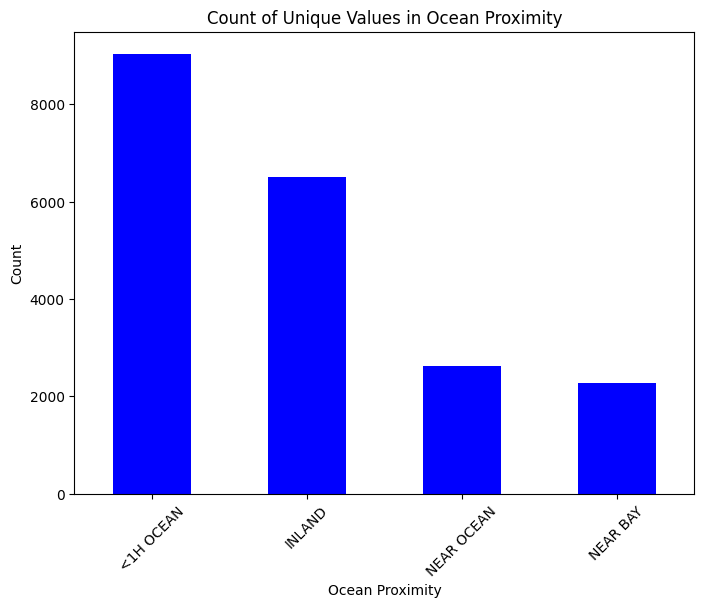

In [ ]:
# Count the unique values
ocean_proximity_counts = df['ocean_proximity'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
ocean_proximity_counts.plot(kind='bar', color='blue')
plt.title('Count of Unique Values in Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Data summaries

In [ ]:
#Summary statistics for all the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20428.0,-119.570986,2.003732,-124.3500,-121.8000,-118.5000,-118.010000,-114.3100
latitude,20428.0,35.633778,2.136312,32.5400,33.9300,34.2600,37.720000,41.9500
housing_median_age,20428.0,28.629724,12.590156,1.0000,18.0000,29.0000,37.000000,52.0000
total_rooms,20428.0,2636.764147,2185.451409,2.0000,1450.0000,2127.0000,3143.250000,39320.0000
total_bedrooms,20428.0,537.899305,421.425970,1.0000,296.0000,435.0000,647.000000,6445.0000
population,20428.0,1425.132220,1133.277418,3.0000,788.0000,1166.0000,1723.000000,35682.0000
households,20428.0,499.488007,382.326831,1.0000,280.0000,409.0000,604.000000,6082.0000
median_income,20428.0,3.871437,1.899432,0.4999,2.5634,3.5375,4.744075,15.0001
median_house_value,20428.0,206821.928432,115412.337452,14999.0000,119475.0000,179700.0000,264700.000000,500001.0000


**Observations:**

- Longitude and latitude both have a realtively low standard deviation, which tells us the districts of homes are not very spread out.

- The average median house age for the districts is 28.6, with a standard deviation of 12.6. Half of the districts have a median house age between 18 and 37. The minimum median house age for a district came out to 1, while the maximum is 52. We can tell from this data summary that the median house age for districts will have slighly more variation in its data.

- The mean number of total rooms for the districts is 2636, with a standard deviation of 2185. Half of the districts have between 1450 and 3143 total rooms, with a maximum of 39320 and a minimum of 2. The data for this variable has a lot of variation, and a high potential of having extreme outliers.

- The average number of total bedrooms in a district is 538, with a standard deviation of 421. Half of the districts have between 296 and 647 total bedrooms, with a minimum of 1 and a maximum of 39320. The data for this variable also has a lot of variation, and will be very spread out from the mean, however not as spread out as total rooms.

- Half of the districts have between 788 and 1723 residents, with a minimum of 3 and a maximum of 35682. We can tell from the standard deviation of 1133, and the differences between the 25th/75th percentiles, and the minimum and maximum values, that the population variable has a lot of variation. This variation can partially account for the high standard deviations in the total rooms and bedrooms variables.

- The mean number of households in a district is 499, with half of the districts having between 280 and 604 households, and a minimum of 1 and maximum of 6082 households. Once again, we are able to tell that the household data has a wide range of variablity. This is another variable that we can partially attribute to the high variations in total rooms and bedrooms. Also, the variation in population may also affect this variable as it did with total rooms and bedrooms.

- Median Income has a relatively low standard deviation, so it shouldn't be challenging to see a pattern in the data, as the data does not have a high amount of variation. However we can tell by the difference between the 75th percentile and the maximum that there will most likely be some outliers that are increasing the mean.

- The average median house value for the districts is 206822, with half of the districts having median house values in the range of 119475 and 264700. This variable has extremely high variation with a standard deviation of 115412, a minimum of 14999 and a maximum of 500001. With this extremely high variation it will be difficult to detect any patterns, and draw meanigful conclusions.

- The average median house value log is the logarithmic transformation of the median house value variable. The logarithmic transformation was able to bring the standard deviation down from 115412 to 0.57. This allows us to make more meanigful conclusions because it stabilizes the variance, gives the data a more normal distribution, and mitigates the effect of outliers.

---------------------------
## Univariate Analysis
---------------------------

### Distribution of variables

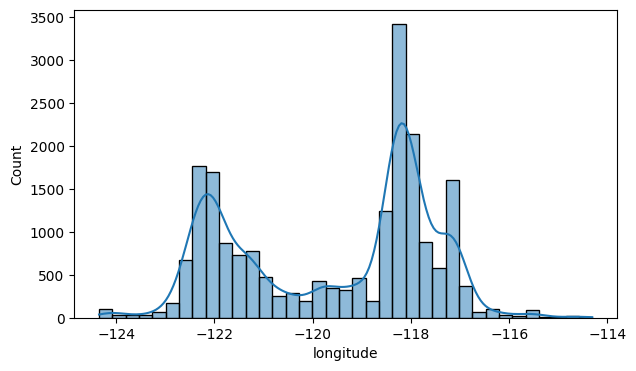

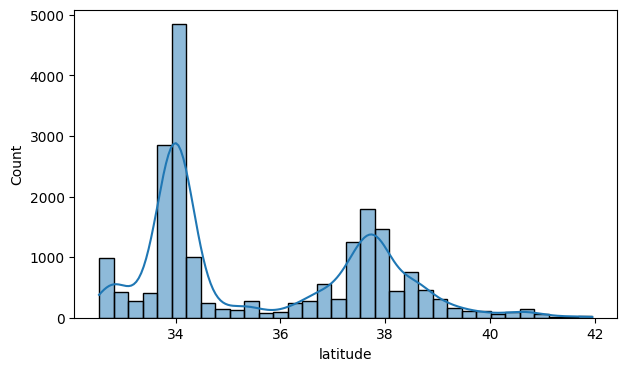

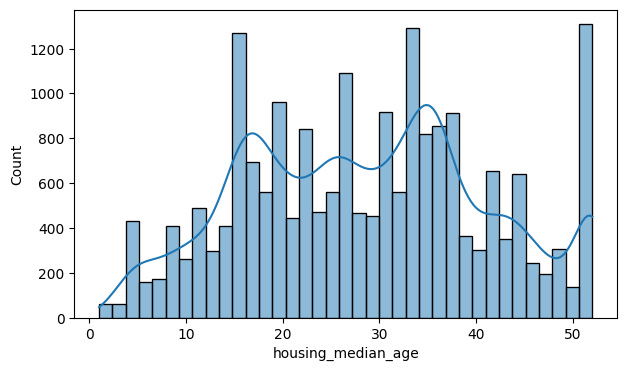

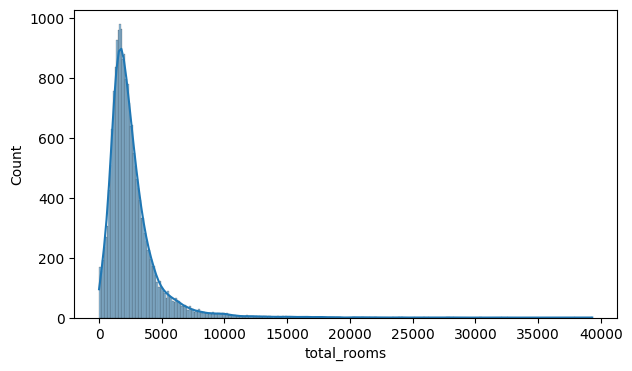

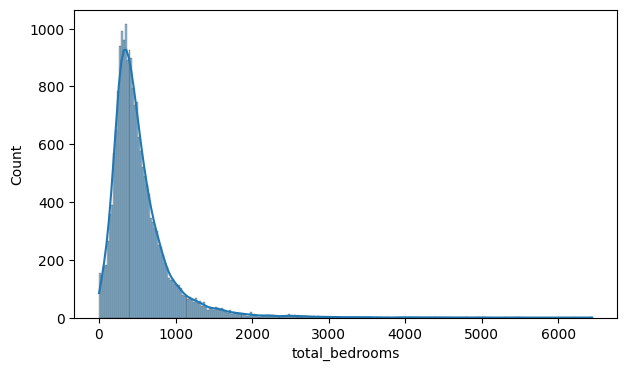

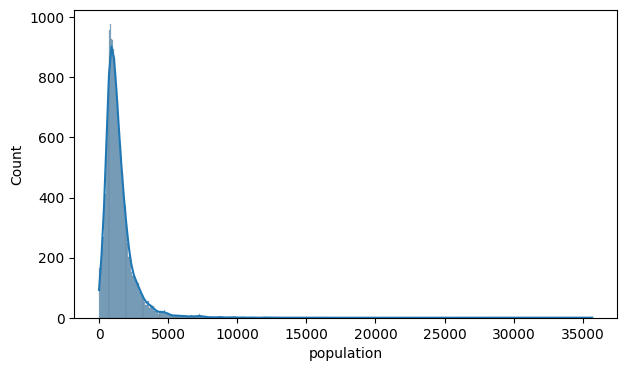

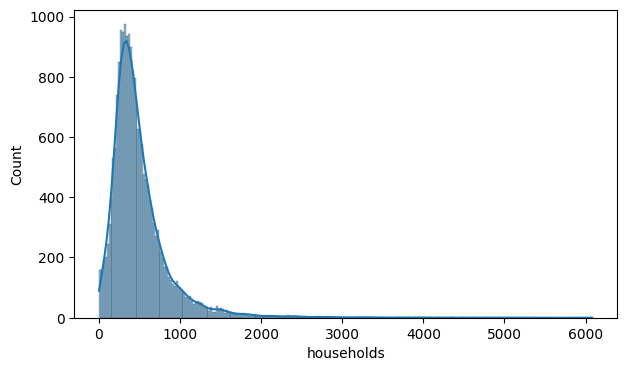

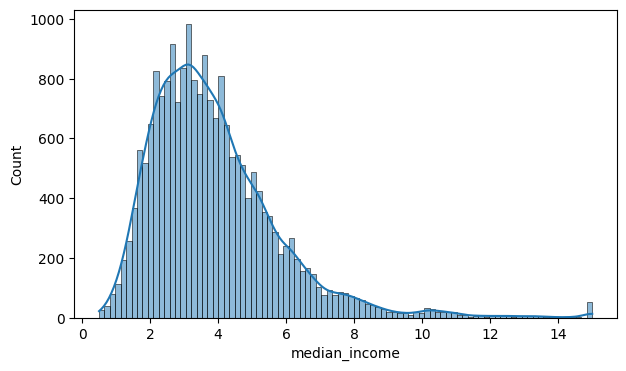

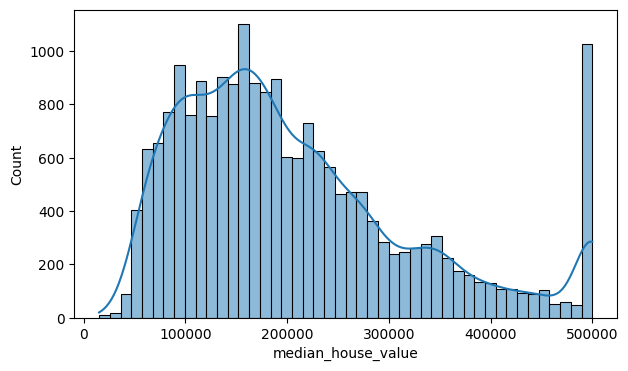

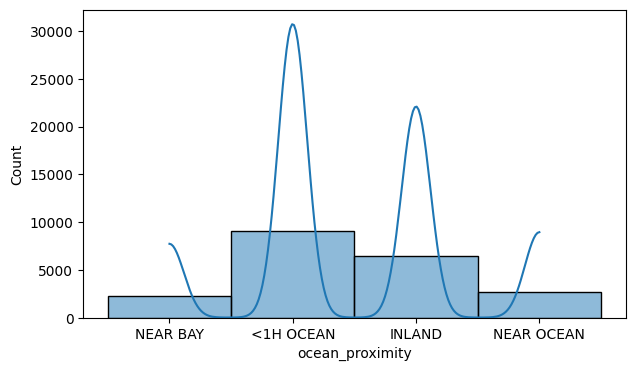

In [ ]:
for i in df.columns:
  plt.figure(figsize=(7,4))
  sns.histplot(data=df, x=i, kde=True)
  plt.show()

**Observations from the Histograms:**

- The longitude and latitude both have a bimodal distribution. There seems to be two areas with a high concentratiton of districts.

- The house median age seems to be multimodal, as there are multiple peaks in the histogram.

- The total rooms, and total bedrooms per district is positively skewed, which means that most districts have a lower amount of rooms, and bedrooms.

- Population and households are both also positively skewed, so we can tell that the majority of districts have lower populations, and a lower number of households.

- The median income is positively skewed, which shows us how the majority of districts have a median income below the midpoint of the data range for the variable.

- The median house value seems to be slightly right skewed, wth some extreme outliers that wll increase the mean.

- The ocean proximity histogram has a binomial distribution, with a majority of districts being less than an hour from the ocean, and a high amount of inland districts.

- The median house value log is slightly left skewed, this tells us that the majority of districts have a higher median house value.

In [ ]:
# converting the dependent variable to log.
df['median_house_value_log'] = np.log(df['median_house_value'])

<Axes: xlabel='median_house_value_log', ylabel='Count'>

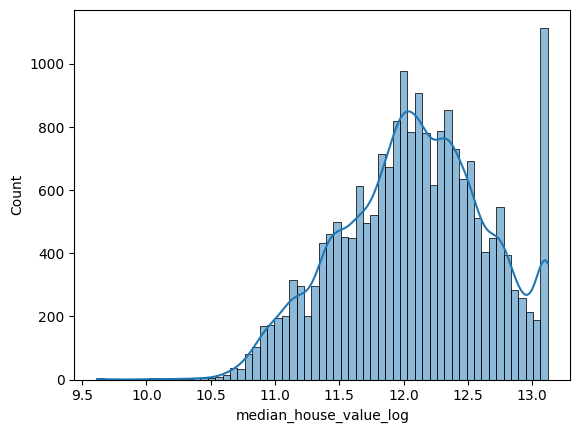

In [ ]:
# Histogram plot of median_house_value_log
sns.histplot(data=df, x='median_house_value_log', kde=True)

In [ ]:
# creating dummy variables for categorical variables
df_1 = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_log,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,13.022764,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,12.789684,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,12.771671,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,12.740517,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,12.743151,False,True,False


In [ ]:
# converting the data frame to int data type
df_1 = df_1.astype(int)

In [ ]:
df_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_log,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,13,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,12,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,12,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,12,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,12,0,1,0


# Bivariate Analysis


Another assumption that is necessary for using a linear regression model is that the independent variables are independent. If this condition is met, we can be relatively sure that the variable contribute unique information to the model. This can be checked by examining the relationships between the feature variables and examining the correlation matrix for multicollinearity.



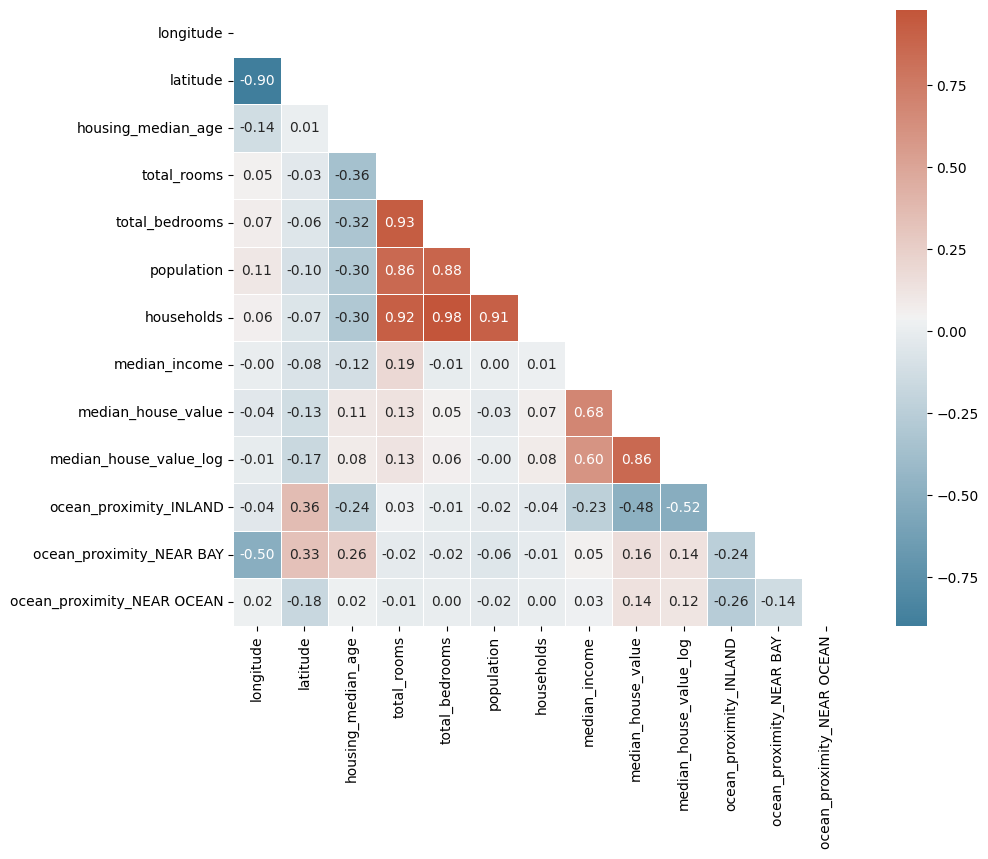

In [ ]:
corr_matrix = df_1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=cmap, mask=mask, square=True, linewidths=.5)

# Show the plot
plt.show()

**Observations:**  

Positive correlations of note are observed between:

- total_bedrooms and total_rooms  
- population and total_rooms  
- households and total_rooms  
- population and total_bedrooms  
- households and total_bedrooms  
- households and population     

Negative correlations of note are observed between:

- latitude and longitude

### Visualizing the relationship between the features having significant correlations (> 0.7)

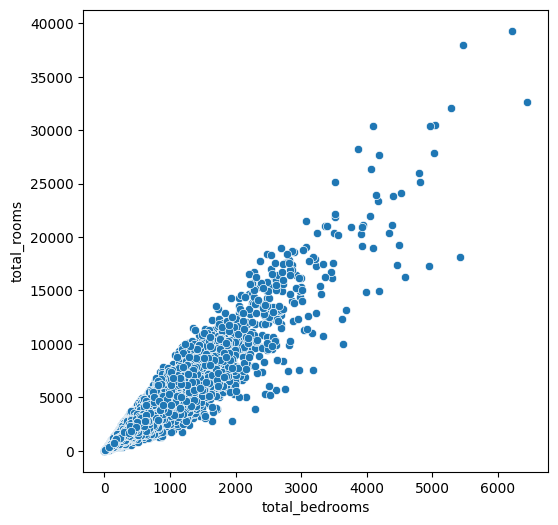

In [ ]:
# scatterplot to visualize the relationship between total_bedrooms and total_rooms
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_1, x='total_bedrooms', y='total_rooms')
plt.show()

**Observations:**

- There is a strong positive correlation between total_bedrooms and total_rooms. As the number of bedrooms increases, the number of rooms tends to increase as well, suggesting that properties with more bedrooms generally have more rooms.  

- The majority of the data points are concentrated towards the lower values of both axes. There are a few data points that lie further away from the main cluster, particularly towards the higher values.

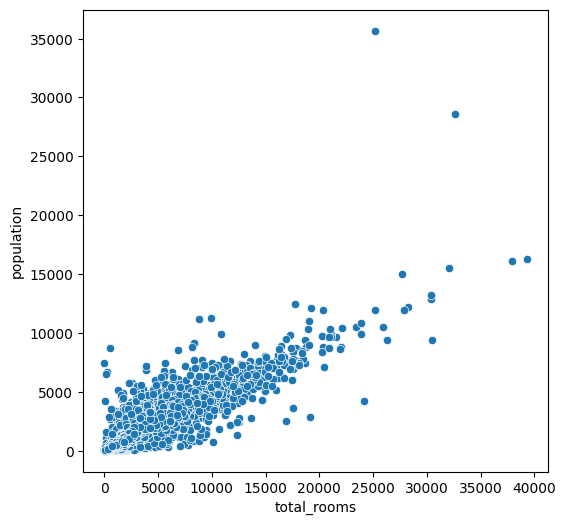

In [ ]:
# scatterplot to visualize the relationship between population and total_rooms
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_1, x='total_rooms', y='population')
plt.show()

**Observations:**

- There is a positive correlation between population and the number of rooms, as the total_room increases the population tends to increase as well. This trend suggests that higher populations are associated with more housing capacity.  
- The majority of data points are clustered in the lower range of population and total_rooms (below 10,000). This might indicate that most areas in the dataset are smaller communities or regions with moderate population and housing numbers.

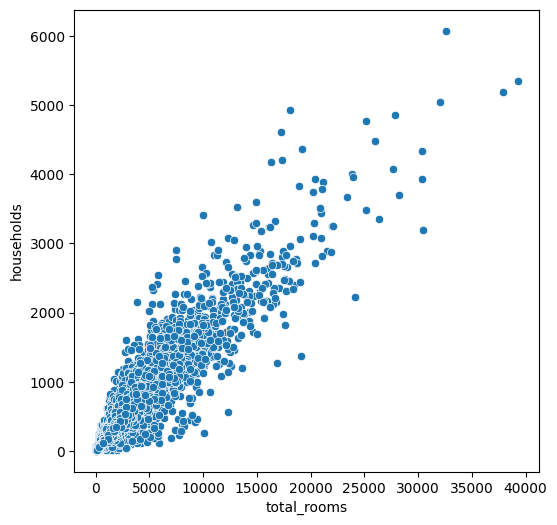

In [ ]:
# scatterplot to visualize the relationship between households and total_rooms
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_1, x='total_rooms', y='households')
plt.show()

**Observations:**

There is a positive correlation between households per district and total rooms per district. This trend shows us that as the amount of households increases so does the number of rooms.

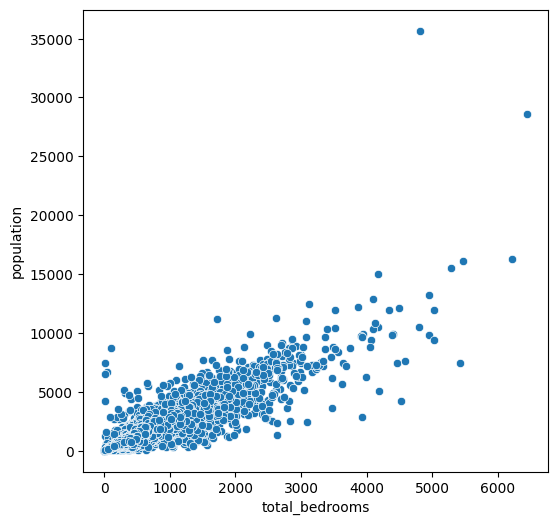

In [ ]:
# scatterplot to visualize the relationship between population and total_bedrooms
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_1, x='total_bedrooms', y='population')
plt.show()

**Observations:**

There is a positive correlation between the population per district and the total number of bedrooms per district. This shows us that if the population of a district is greater, the total number of bedrooms will also be greater. The majority of data points are clustered in the lower range, below a population of 10000, and 3000 total bedrooms.

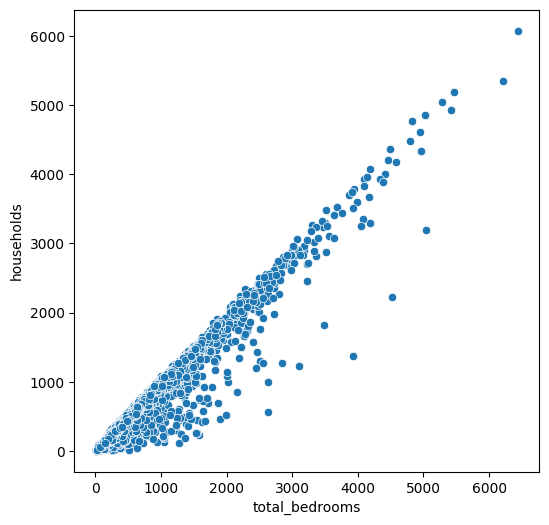

In [ ]:
# scatterplot to visualize the relationship between households and total_bedrooms
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_1, x='total_bedrooms', y='households')
plt.show()

**Observations**:

There is also a positive correlation between the households per district and the total bedrooms per district, which tells us that as the number of households increases, so will the amount of total bedrooms.

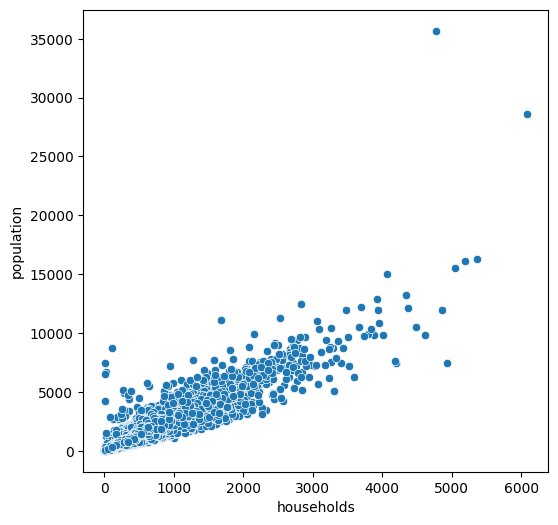

In [ ]:
# scatterplot to visualize the relationship between households and population
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_1, x='households', y='population')
plt.show()

**Observations**:

Population per district and households per district also have a positive correlation. We can see that as the population increases so does the number of households.

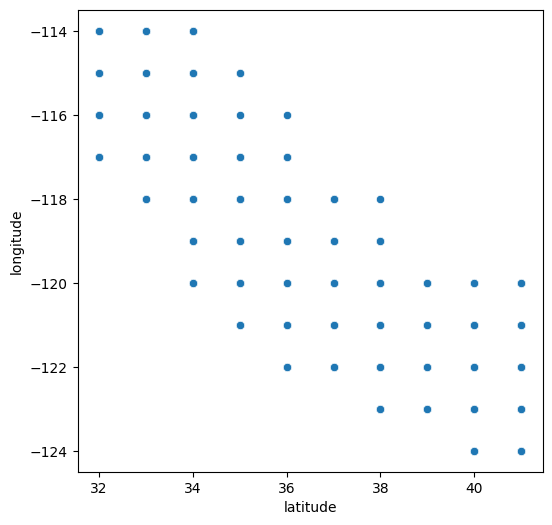

In [ ]:
# scatterplot to visualize the relationship between latitude and longitude
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_1, x='latitude', y='longitude')
plt.show()


**Observations:**

Longitude and Latitude have a negative correlation, which may be related to a geographical/directional trend in the data set for the district locations.

Since latitude and longitude are not helping in predicting the house prices and the correlation is near to -1, we remove it.

In [ ]:
# removing latitude and longitutde columns from the dataframe
df_1 = df_1.drop(columns = {'latitude', 'longitude'})

# Removing Outliers

In [ ]:
# remove the data corresponding to high total_rooms
df1 = df_1[df_1['total_rooms'] < 5682.5]    #iqr(interquartile range)=q3-q1, outlier=q3+1.5*iqr -> iqr=3143-1450, outlier=3143+1.5*iqr=5682.5
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between total_rooms and total_bedrooms is', pearsonr(df1['total_rooms'], df1['total_bedrooms'])[0])

The correlation between total_rooms and total_bedrooms is 0.8675227118082969


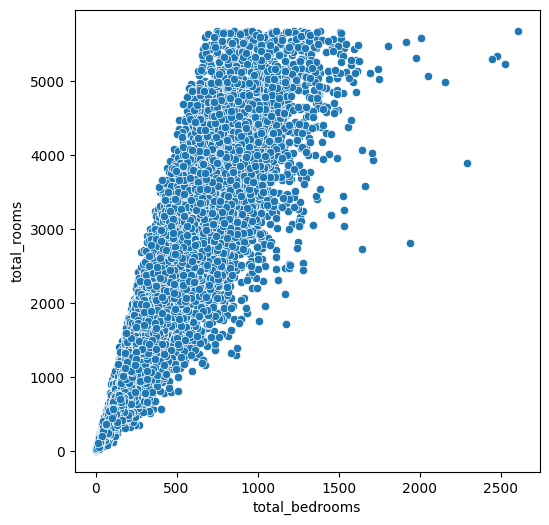

In [ ]:
# scatterplot to visualize the relationship between total_bedrooms and total_rooms after removing outliers
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df1, x='total_bedrooms', y='total_rooms')
plt.show()

**Observations**:

After removing outliers from the total rooms variable we see a steep positive correlation between total rooms and total bedrooms. This suggests that as the total number of rooms drastically increases, the total number of bedrooms increases at a more gradual rate.

In [ ]:
# remove the data corresponding to high population
df1 = df_1[df_1['population'] < 3125.5]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between total_rooms and total_bedrooms is', pearsonr(df1['population'], df1['households'])[0])

The correlation between total_rooms and total_bedrooms is 0.8632540657887228


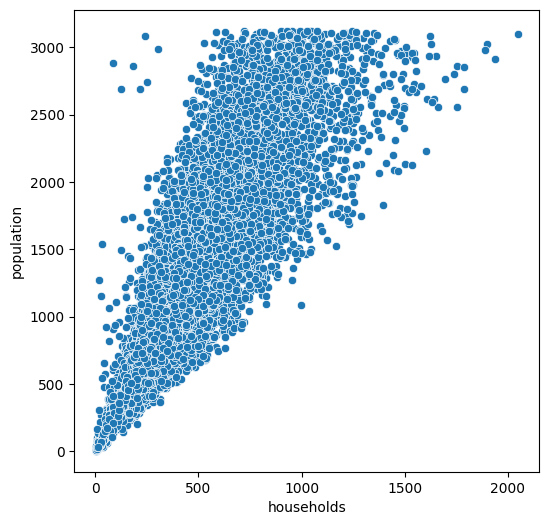

In [ ]:
# scatterplot to visualize the relationship between households and population after removing outliers
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df1, x='households', y='population')
plt.show()

**Observations**:

After removing outliers from the population and households data, we see a positive correlation between the two variables still. Since the outliers were removed, the data no longer is clustered in the lower range.

---------------------------------------------------------------------------------

### Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [ ]:
# separate the dependent and indepedent variable
Y = df_1['median_house_value_log']
X = df_1.drop(columns = {'median_house_value', 'median_house_value_log'})

In [ ]:
# add the intercept term
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    numerical_train = train.select_dtypes(include=['number'])

    vif = pd.DataFrame()
    vif["feature"] = numerical_train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(numerical_train.values, i) for i in range(len(numerical_train.columns))
    ]
    return vif


print(checking_vif(X_train))

                      feature        VIF
0                       const  22.923295
1          housing_median_age   1.309586
2                 total_rooms  12.558768
3              total_bedrooms  35.477663
4                  population   6.070399
5                  households  34.306313
6               median_income   1.709130
7      ocean_proximity_INLAND   1.444675
8    ocean_proximity_NEAR BAY   1.187085
9  ocean_proximity_NEAR OCEAN   1.140194


**Drop the column 'total_bedrooms' and 'households' from the training data and check if multicollinearity is removed or not**

In [ ]:
X_test.head()

,const,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6715,1.0,38,3039,487,1131,465,7,0,0,0
4121,1.0,38,1826,300,793,297,5,0,0,0
14472,1.0,26,1647,261,694,259,4,0,0,1
20272,1.0,16,5297,810,1489,667,6,0,0,1
11782,1.0,18,549,143,249,136,0,1,0,0


In [ ]:
#dropping the total_bedrooms column from X_train and X_test.
if 'total_bedrooms' in X_train.columns:
    X_train = X_train.drop(columns='total_bedrooms')

if 'total_bedrooms' in X_test.columns:
    X_test = X_test.drop(columns='total_bedrooms')

# Check for VIF
print(checking_vif(X_train))

                      feature        VIF
0                       const  21.802844
1          housing_median_age   1.304307
2                 total_rooms   9.521482
3                  population   5.689986
4                  households  11.500369
5               median_income   1.494790
6      ocean_proximity_INLAND   1.442286
7    ocean_proximity_NEAR BAY   1.186311
8  ocean_proximity_NEAR OCEAN   1.140076


In [ ]:
#dropping the households column from X_train and X_test.
if 'households' in X_train.columns:
    X_train = X_train.drop(columns='households')

if 'households' in X_test.columns:
    X_test = X_test.drop(columns='households')

# Check for VIF
print(checking_vif(X_train))

                      feature        VIF
0                       const  20.016524
1          housing_median_age   1.303822
2                 total_rooms   4.626963
3                  population   4.332420
4               median_income   1.281344
5      ocean_proximity_INLAND   1.367836
6    ocean_proximity_NEAR BAY   1.183337
7  ocean_proximity_NEAR OCEAN   1.140050


In [ ]:
X_train.head()

,const,housing_median_age,total_rooms,population,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14660,1.0,34,1748,800,4,0,0,1
5165,1.0,39,1701,1468,1,0,0,0
15839,1.0,52,3521,1415,4,0,1,0
20232,1.0,22,2486,709,2,0,0,1
11696,1.0,21,5195,2539,4,0,0,0


In [ ]:
X_test.head()


,const,housing_median_age,total_rooms,population,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6715,1.0,38,3039,1131,7,0,0,0
4121,1.0,38,1826,793,5,0,0,0
14472,1.0,26,1647,694,4,0,0,1
20272,1.0,16,5297,1489,6,0,0,1
11782,1.0,18,549,249,0,1,0,0


In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# create the model
model1 = sm.OLS(y_train,X_train).fit()
# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_house_value_log   R-squared:                       0.524
Model:                                OLS   Adj. R-squared:                  0.524
Method:                     Least Squares   F-statistic:                     2249.
Date:                    Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                            02:29:54   Log-Likelihood:                -9100.3
No. Observations:                   14299   AIC:                         1.822e+04
Df Residuals:                       14291   BIC:                         1.828e+04
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         11.1161      0.017    649.575      0.000      11.083      11.150
housing_median_age             0.0035      0.000     10.043      0.000       0.003       0.004
total_rooms                 6.985e-05   3.75e-06     18.642      0.000    6.25e-05    7.72e-05
population                    -0.0001   6.88e-06    -16.023      0.000      -0.000   -9.67e-05
median_income                  0.1614      0.002     71.509      0.000       0.157       0.166
ocean_proximity_INLAND        -0.5785      0.010    -60.282      0.000      -0.597      -0.560
ocean_proximity_NEAR BAY      -0.0149      0.013     -1.129      0.259      -0.041       0.011
ocean_proximity_NEAR OCEAN    -0.0087      0.012     -0.711      0.477      -0.033       0.015
==============================================================================
Omnibus:                      212.324   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.178
Skew:                           0.153   Prob(JB):                     3.31e-72
Kurtosis:                       3.678   Cond. No.                     1.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p value of ocean_proximity_NEAR BAY and ocean_proximity_NEAR OCEAN is greater than 0.05 so we drop these two variables as well.

In [ ]:
#dropping ocean_proximity_NEAR BAY
if 'ocean_proximity_NEAR BAY' in X_train.columns:
    X_train = X_train.drop(columns='ocean_proximity_NEAR BAY')

if 'ocean_proximity_NEAR BAY' in X_test.columns:
    X_test = X_test.drop(columns='ocean_proximity_NEAR BAY')

In [ ]:
#dropping ocean_proximity_NEAR OCEAN
if 'ocean_proximity_NEAR OCEAN' in X_train.columns:
    X_train = X_train.drop(columns='ocean_proximity_NEAR OCEAN')

if 'ocean_proximity_NEAR OCEAN' in X_test.columns:
    X_test = X_test.drop(columns='ocean_proximity_NEAR OCEAN')

In [ ]:
# creating the model
model2 = sm.OLS(y_train,X_train).fit() #write your code here
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_house_value_log   R-squared:                       0.524
Model:                                OLS   Adj. R-squared:                  0.524
Method:                     Least Squares   F-statistic:                     3148.
Date:                    Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                            02:29:54   Log-Likelihood:                -9101.1
No. Observations:                   14299   AIC:                         1.821e+04
Df Residuals:                       14293   BIC:                         1.826e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11.1138      0.017    665.192      0.000      11.081      11.147
housing_median_age         0.0034      0.000     10.071      0.000       0.003       0.004
total_rooms             6.918e-05   3.71e-06     18.665      0.000    6.19e-05    7.64e-05
population                -0.0001   6.81e-06    -16.017      0.000      -0.000   -9.57e-05
median_income              0.1615      0.002     71.783      0.000       0.157       0.166
ocean_proximity_INLAND    -0.5746      0.009    -64.293      0.000      -0.592      -0.557
==============================================================================
Omnibus:                      208.864   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.175
Skew:                           0.151   Prob(JB):                     6.66e-71
Kurtosis:                       3.672   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Checking Assumptions

**Assumption 1:** Mean Residuals

In [ ]:
# Calculate the residuals
y_pred = model2.predict(X_train)
residuals = y_train - y_pred

# Check the mean of residuals
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals}")

Mean of residuals: 1.1936710488188857e-13


**Observations**:

We can see here that we have very small residuals, the difference between the observed and predicted values, which suggests that our model fits the data well and has good predicitive accuracy.

 **Assumption 2**: No Heteroscedasticity

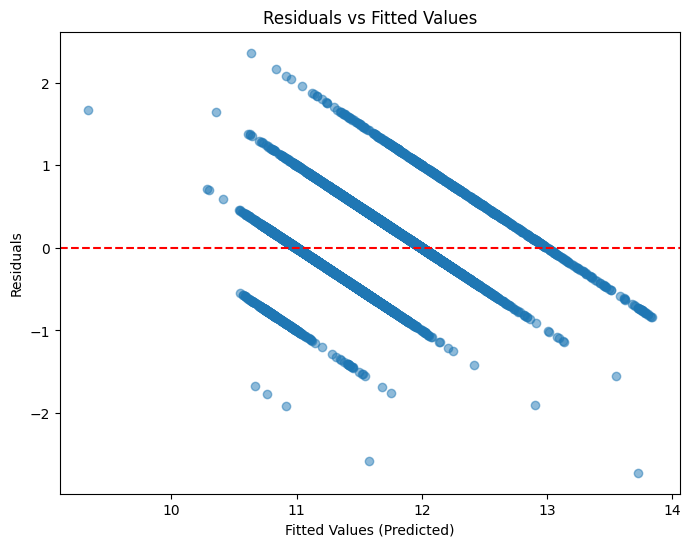

In [ ]:
# Plot residuals vs fitted values to check for heteroscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.show()


In [ ]:
# importing libraries from statsmodels
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
##import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.9874915254672291), ('p-value', 0.7026079631982489)]

**Observations**:

We can see from the f statistic and the p-value that our model doesn't violate the homoscedasticity assumption. The high p-value implies that there is not sufficient evidence to claim a violation of the homoscedasticity assumption, and the F-statistic indicates that the variance of the residuals is relatively similar across different lecels of the predicted values.

**Assumption 3**: Linearity of Variables

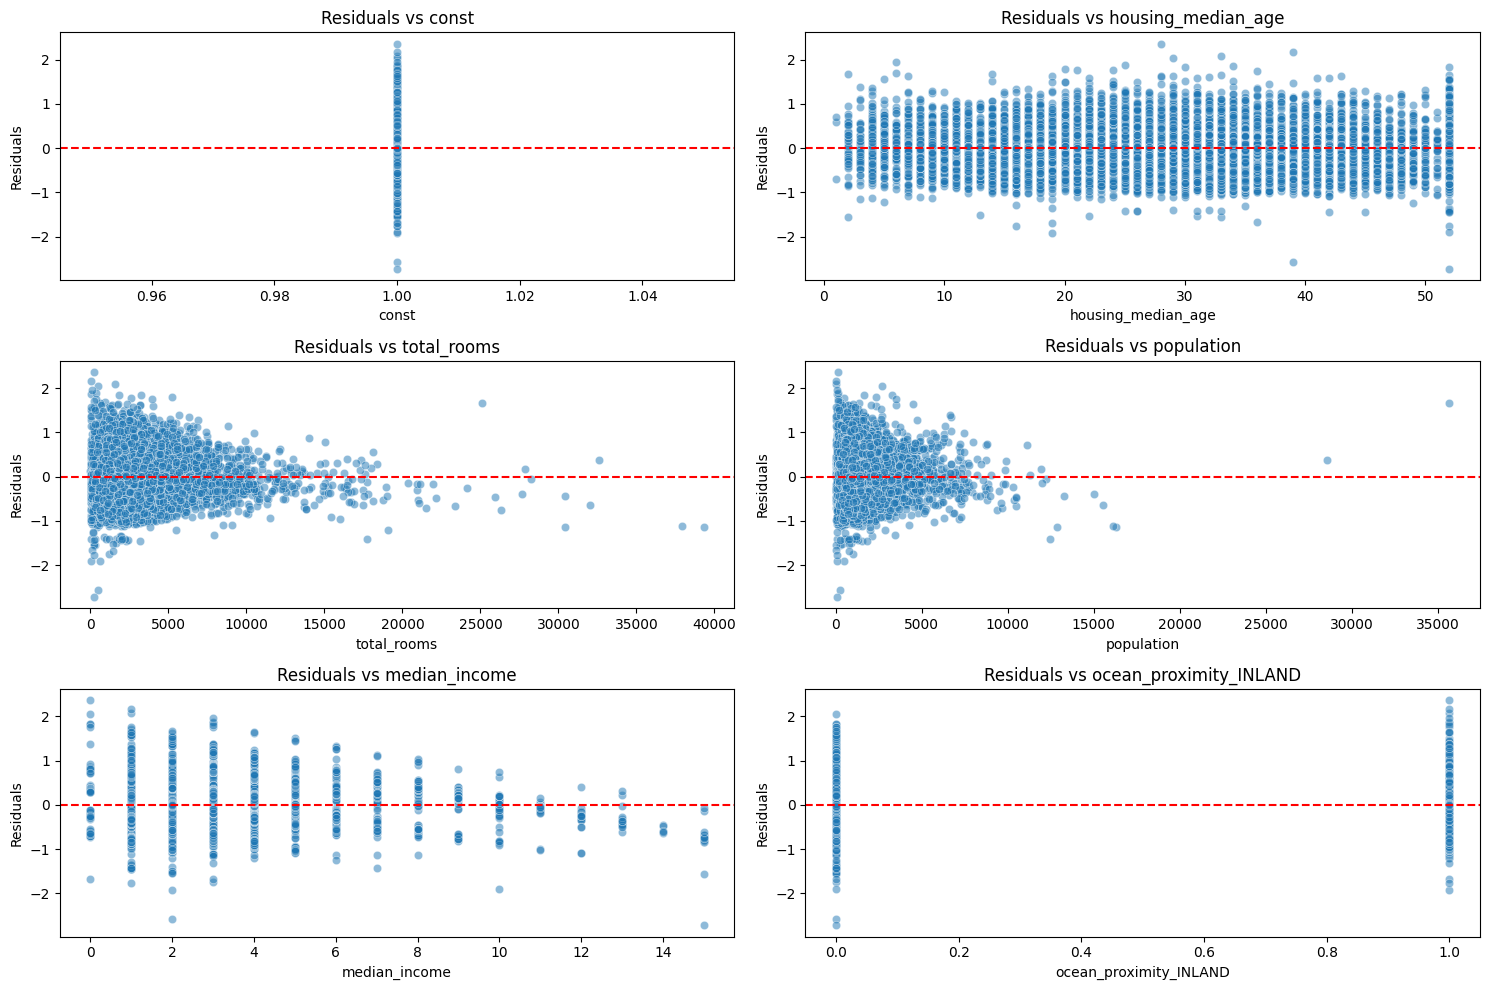

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(X_train.columns):
    sns.scatterplot(x=X_train[col], y=residuals, ax=axs[i], alpha=0.5)
    axs[i].axhline(0, color='r', linestyle='--')
    axs[i].set_title(f'Residuals vs {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

**Observations:**


**Median Age:** When looking at the residuals vs median age we see a lot of variablity in both, the majority being between 1 and -1 for residuals, suggesting that the prediction errors are relatively small.

**Total Rooms**: When looking at residuals vs total rooms, we see that the residuals on the lower range of the x axis are quite high, so districts with 0 total rooms are at higher risk of poor model performance on this feature. However, as the total rooms per district increases the residuals get closer to 0, meaning that the model performs well with total rooms over about 7000.

**Population**: When looking at the population residuals we see a similar shape in the data points, which suggests that as the population per district grows, the amount of residuals and errors decrease.

**Median Income**: When looking at median income and residuals we see that the data points are in vertical alignment, and there are multiple vertical lines of data points across the x axis. This is most likely suggesting that median income is more of a categorical feature than a continuous one, and most people have below 8 for median income. We can see that once the median income gets to about 3.5, the residuals gradually start getting closer to 0, meaning that over 3.5 median income will have better performance than under 3.5.

**Ocean Proximity Inland**: We also see relatively high residuals when looking at ocean proximity inland. This could indicate that the prediction errors are relatively consisttent within each category. This range of residuals indicates that the model's predictions for properties categorized by ocean proximity inland are relatively accurate, with no extreme outliers.




**Assumption 4:** Check Normality of Residuals

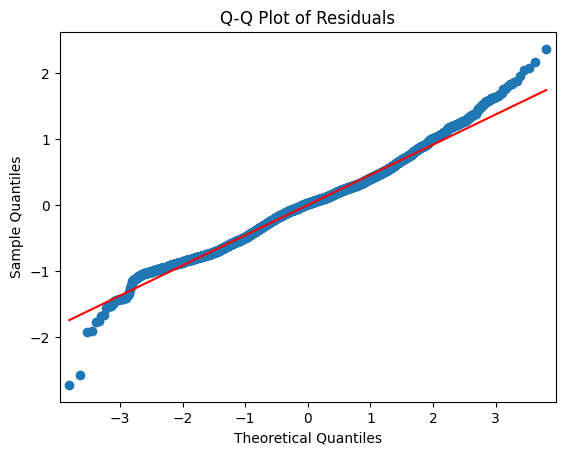

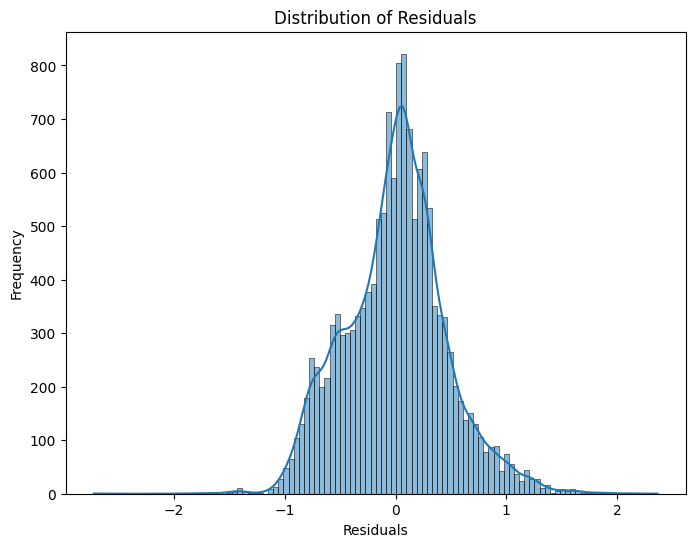

In [ ]:
#### Code:
# Q-Q plot to check normality of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Observations: We can see that the residuals are normaally distributed, which tells us that the model does well to generalize the data patterns from the training set. This allows the model to maintain its accuracy, precision, f1-score, and recall performance on new data sets.

In [ ]:
#split the scaled dataset
X_train_scaled, X_test_scaled, y_train_log, y_test_log = train_test_split(X_scaled, Y, test_size=0.30 , random_state=42)

# Checking Different Regression Models

**Model 1**: Linear Regression

In [ ]:
# Create a linear regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train_scaled, y_train_log)

LinearRegression()

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression_model(model, X_train, X_test, y_train, y_test):

    # Predictions on training data
    y_train_pred = model.predict(X_train)

    # Predictions on testing data
    y_test_pred = model.predict(X_test)

    # Calculate metrics for both train and test data
    metrics = {
        "Data": ["Train", "Test"],
        "MSE": [
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred),
        ],
        "MAE": [
            mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_test, y_test_pred),
        ],
        "RMSE": [
            np.sqrt(mean_squared_error(y_train, y_train_pred)),
            np.sqrt(mean_squared_error(y_test, y_test_pred)),
        ],
        "R-squared": [
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred),
        ],
    }

    # Create a DataFrame to display the metrics
    performance_df = pd.DataFrame(metrics)

    # Print the performance DataFrame
    return performance_df

In [ ]:
#evaluating linear regression model
evaluate_regression_model(linear_model, X_train_scaled, X_test_scaled, y_train_log, y_test_log)

,Data,MSE,MAE,RMSE,R-squared
0,Train,0.200020,0.343721,0.447236,0.538995
1,Test,0.203091,0.344198,0.450656,0.541467


**Consistency:** The performance metrics are consistent across both training and testing datasets, with minimal differences. This indicates the model avoids overfitting and generalizes well to new data.

**Low Errors:** The low values for MSE (Train: 0.200020, Test: 0.203091), MAE (Train: 0.343721, Test: 0.344198), and RMSE (Train: 0.447236, Test: 0.450656) indicate that the model's predictions are close to the actual values.

**Good Fit:** The R-squared values (Train: 0.538995, Test: 0.541467), while not extremely high, suggest that the model explains about 54% of the variance in the target variable on the test data. This indicates a reasonable level of predictive accuracy and reliability, with potential for further refinement.

**Back transforming the coefficients from Log Scale.**

In [ ]:
coef = model2.params #write your code here
out_p=pd.DataFrame((np.exp(coef)-1)*100, columns=['Coefficients'])
out_p

,Coefficients
const,6.708705e+06
housing_median_age,3.420914e-01
total_rooms,6.918160e-03
population,-1.089931e-02
median_income,1.752809e+01
ocean_proximity_INLAND,-4.370792e+01


**Observations:**

**Housing Median Age:** For every 1-unit increase in the median age of houses, the predicted outcome increases by approximately 3.42%, holding all else constant.

**Total Rooms:** For every additional room, the predicted outcome increases by approximately 0.69%, holding all else constant.

**Population:** For every additional person in the population, the predicted outcome decreases by approximately 1.09%, holding all else constant.

**Median Income:** For every 1-unit increase in median income, the predicted outcome increases significantly by approximately 17.53%, making it a strong positive predictor.

**Ocean Proximity (INLAND):** The "INLAND" category of ocean proximity reduces the predicted outcome by approximately 43.71%, indicating a substantial negative impact compared to the baseline.

**Model 2**: Decision Tree for Regression

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression_model(model, X_train, X_test, y_train, y_test):

    # Predictions on training data
    y_train_pred = model.predict(X_train)

    # Predictions on testing data
    y_test_pred = model.predict(X_test)

    # Calculate metrics for both train and test data
    metrics = {
        "Data": ["Train", "Test"],
        "MSE": [
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred),
        ],
        "MAE": [
            mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_test, y_test_pred),
        ],
        "RMSE": [
            np.sqrt(mean_squared_error(y_train, y_train_pred)),
            np.sqrt(mean_squared_error(y_test, y_test_pred)),
        ],
        "R-squared": [
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred),
        ],
    }

    # Create a DataFrame to display the metrics
    performance_df = pd.DataFrame(metrics)

    # Print the performance DataFrame
    return performance_df

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Create a regression tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train_scaled, y_train_log)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Checking model performance
evaluate_regression_model(tree_model,X_train_scaled,X_test_scaled, y_train_log, y_test_log)

,Data,MSE,MAE,RMSE,R-squared
0,Train,0.000000,0.000000,0.000000,1.000000
1,Test,0.354381,0.330886,0.595299,0.199889


**Observations from the metrics:**
- The model achieved perfect performance on the training set, with all error metrics (MSE, MAE, and RMSE) being 0 and an R-squared of 1. This indicates that the model fits the training data exceptionally well.
- The model's Mean Squared Error (MSE) on the test set is 0.37037, with a Mean Absolute Error (MAE) of 0.345897 and a Root Mean Squared Error (RMSE) of 0.608581. These non-zero errors suggest that the model is not as accurate on unseen data.
- The R-squared value for the test set is only 0.139115, indicating that the model explains only around 13.9% of the variance in the test data. This is significantly lower than the R-squared for the training data.
- The model may is overfitting on the training data leading to poor generalization on new, unseen data.

**Model 3:** Support Vector Regression

In [ ]:
from sklearn.svm import SVR
# Create and train the SVR model with adjusted parameters
svr_model = SVR(kernel='linear', C=1, max_iter=10000)
svr_model.fit(X_train_scaled, y_train_log)

SVR(C=1, kernel='linear', max_iter=10000)

In [ ]:
evaluate_regression_model(svr_model, X_train_scaled, X_test_scaled,y_train_log, y_test_log)

,Data,MSE,MAE,RMSE,R-squared
0,Train,0.329810,0.444943,0.574291,0.239857
1,Test,0.323855,0.442062,0.569082,0.268810


**Observations:**

**Higher Errors:** The MSE, MAE, and RMSE values are higher in the SVR model compared to the linear regression model, indicating that the SVR model's predictions are less accurate.

**Weaker Fit:** The lower R-squared values show that the SVR model explains less of the variance in house prices, suggesting a weaker fit to the data.

**Consistency:** Despite the higher error rates, the consistency between training and test data metrics suggests that the SVR model is not overfitting but might not be capturing the underlying patterns in the data as effectively as the linear regression model.

**Model 4:** Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Checking model performance
evaluate_regression_model(rf_model, X_train, X_test,y_train, y_test)

,Data,MSE,MAE,RMSE,R-squared
0,Train,0.029474,0.121742,0.171680,0.932921
1,Test,0.213069,0.330968,0.461594,0.504745


**Training Performance:** The random forest regressor performs exceptionally well on the training data, achieving an R-squared value of 0.9329. This high R-squared indicates that the model is fitting the training data closely. Additionally, the error metrics are low, with MSE (Mean Squared Error) of 0.0295, MAE (Mean Absolute Error) of 0.1217, and RMSE (Root Mean Squared Error) of 0.1717, confirming a strong fit.

**Generalization:** On the test data, there is a noticeable drop in performance. The R-squared value drops to 0.5047, indicating that the model explains around 50% of the variance in the test data, which is significantly lower compared to the training data. The error metrics also increase, with MSE rising to 0.2131, MAE to 0.3310, and RMSE to 0.4616. This suggests that the model is not generalizing as well to unseen data.

**Consistency:** The metrics indicate a lack of consistency between training and testing performance, suggesting overfitting. The model fits the training data exceptionally well but does not generalize effectively to unseen test data.

**Model 5:** Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model with different learning rates
for lr in [0.01, 0.1, 0.2, 0.5]:
    gb_model = GradientBoostingRegressor(learning_rate=lr)
    gb_model.fit(X_train, y_train)

    # Evaluate on test set
    y_test_pred_gb = gb_model.predict(X_test)
    mse_gb = mean_squared_error(y_test, y_test_pred_gb)
    print(f"Learning Rate: {lr}, Test MSE: {mse_gb}")

Learning Rate: 0.01, Test MSE: 0.2385004794380404
Learning Rate: 0.1, Test MSE: 0.19183798365170962
Learning Rate: 0.2, Test MSE: 0.19137646966057448
Learning Rate: 0.5, Test MSE: 0.19820859271214405


**Observation:**

The learning rate of 0.2 achieves the lowest Test MSE (0.1914), suggesting that this might be an optimal choice among the tested rates.

In [ ]:
#evaluating the regression metrics
evaluate_regression_model(gb_model, X_train, X_test,y_train, y_test)

,Data,MSE,MAE,RMSE,R-squared
0,Train,0.163488,0.306492,0.404336,0.627921
1,Test,0.198209,0.337084,0.445206,0.539286


**Observations:**

* The model shows a moderate fit on both the training and test sets. The R-squared values are 0.6279 for the training set and 0.5400 for the test set, indicating reasonable predictive power without excessive overfitting.
* There is a small increase in error metrics (MSE, MAE, and RMSE) on the test set compared to the training set, which is typical and suggests the model generalizes relatively well.
* While there is still some gap between training and test metrics, the chosen learning rate and model configuration provide a balanced fit, avoiding both underfitting and overfitting.

In [ ]:
from sklearn.ensemble import VotingRegressor



# Creating a voting regressor with the selected models


voting_reg = VotingRegressor(estimators=[
    ('Linear Regression',linear_model),

       ('Hyperparameter tuned Random Forest Regressor', best_rf_model)
])

# Train the voting regressor
voting_reg.fit(X_train, y_train)


# Make predictions using the voting regressor

y_pred_voting1 = voting_reg.predict(X_test)

# Evaluate the voting regressor

evaluate_regression_model(voting_reg,X_train,X_test,y_train,y_test)

,Data,MSE,MAE,RMSE,R-squared
0,Train,0.171995,0.313281,0.414723,0.608559
1,Test,0.192221,0.331750,0.438430,0.553204


**Observations:**

**Good Performance:** The voting regressor, which combines logistic regression and gradient boosting, shows strong performance on both training and test data. The low MSE, MAE, and RMSE values indicate accurate predictions.

**Generalization:** The model generalizes well to unseen data, as indicated by the consistent performance metrics between training and test datasets.

**Slight OverFit**: The R-squared values, while slightly lower on the test data shows that the data slightly overfits the training data, still indicate that the model explains a 54% portion of the variance in house prices.

In [ ]:
from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for hyperparameter tuning
param_grid = {
  'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
 }

# # Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# # Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# # Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# # Get the best model
best_rf_model = grid_search.best_estimator_

# # Evaluate the best model on the test data
y_train_pred_best_rf = best_rf_model.predict(X_train)
y_test_pred_best_rf = best_rf_model.predict(X_test)
print("R-squared for the best Random Forest model (train): ", r2_score(y_train, y_train_pred_best_rf))
print("R-squared for the best Random Forest model (test): ", r2_score(y_test, y_test_pred_best_rf))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
R-squared for the best Random Forest model (train):  0.6588942947395496
R-squared for the best Random Forest model (test):  0.5498095425520542


**Observations:**
* The R-squared value on the training set is 0.6589, indicating that the model explains approximately 65.89% of the variance in the training data.
* The R-squared value on the test set is 0.5498, showing that the model explains about 54.98% of the variance in the test data. This decrease from the training R-squared suggests that there is some degree of overfitting, but it is not severe.
* The model shows fairly consistent performance between the training and test sets, indicating a decent balance between bias and variance. This suggests that the chosen hyperparameters are effective in controlling overfitting while still capturing meaningful patterns in the data.